In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
df=pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2.0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1.0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [302]:
df.shape

(891, 12)

In [303]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [304]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2.0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1.0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3.0,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [305]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [306]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           5
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [307]:
#survival rate for males vs. females
survival_rate = df.groupby('Sex')['Survived'].mean()*100
print(survival_rate)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


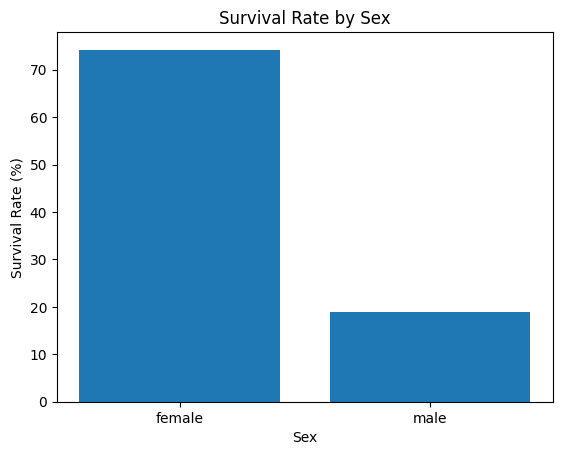

In [308]:
plt.bar(survival_rate.index,survival_rate.values,)
plt.xlabel("Sex")  
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Sex")
plt.show()

In [309]:
survival_class = df.groupby('Pclass')['Survived'].mean()*100
print(survival_class)

Pclass
1.0    62.962963
2.0    47.282609
3.0    24.279835
Name: Survived, dtype: float64


([<matplotlib.patches.Wedge at 0x24f4135c550>,
 [Text(0.11026817110401971, 1.094459195420905, '1.0'),
  Text(-0.6808606249774949, -0.8639611156500362, '2.0'),
  Text(0.9278613638354054, -0.5908242458646239, '3.0')],
 [Text(0.06014627514764711, 0.5969777429568572, '46.8%'),
  Text(-0.3713785227149972, -0.4712515176272924, '35.1%'),
  Text(0.5061061984556756, -0.32226777047161304, '18.0%')])

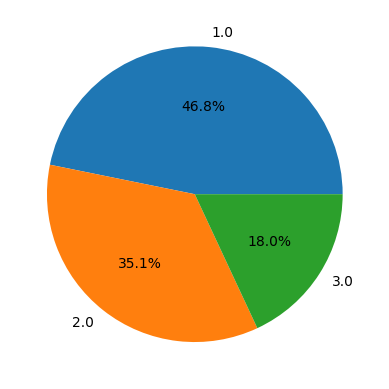

In [310]:
plt.pie(survival_class.values,labels=survival_class.index,autopct='%.1f%%')

In [311]:
df['family_size'] = df['SibSp'] + df['Parch']

In [312]:
survival_family = df.groupby('family_size')['Survived'].mean()*100
print(survival_family)

family_size
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64


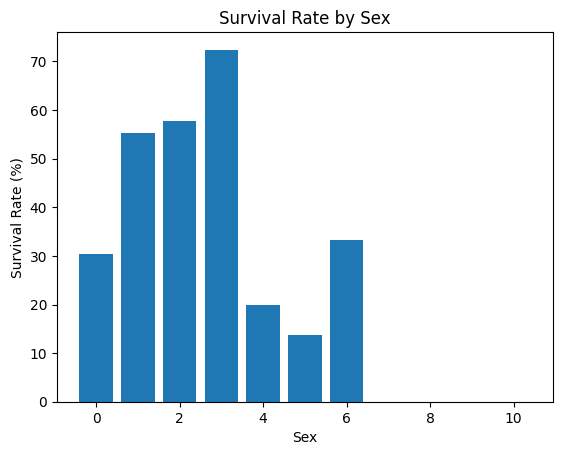

In [313]:
plt.figure()
plt.bar(survival_family.index, survival_family.values)
plt.xlabel("Sex")   
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Sex")
plt.show()

In [314]:
survival_port = df.groupby('Embarked')['Survived'].mean()*100
print(survival_port)

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


In [315]:
df['fare_group'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
Survived_by_fare=df.groupby('fare_group')['Survived'].mean() * 100
print(Survived_by_fare)

fare_group
Low         19.730942
Mid-Low     30.357143
Mid-High    45.495495
High        58.108108
Name: Survived, dtype: float64


C:\Users\aswat\AppData\Local\Temp\ipykernel_6740\3301818427.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Survived_by_fare=df.groupby('fare_group')['Survived'].mean() * 100


In [316]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           5
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
fare_group       0
dtype: int64

In [317]:
df.drop(columns=['Cabin','Name','fare_bin','fare_group','PassengerId','Ticket'],
        inplace=True,errors="ignore")


In [318]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'family_size'],
      dtype='object')

In [319]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Pclass"].fillna(df["Pclass"].mode()[0], inplace=True)
df.isna().sum()

C:\Users\aswat\AppData\Local\Temp\ipykernel_6740\130449538.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Pclass"].fillna(df["Pclass"].mode()[0], inplace=True)


Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [320]:
df.dtypes

Survived         int64
Pclass         float64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
family_size      int64
dtype: object

In [321]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df["Sex"] = lab.fit_transform(df["Sex"])
df["Embarked"] = lab.fit_transform(df["Embarked"])

In [322]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [323]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size
114,3.0,0,17.0,0,0,14.4583,0,0
874,2.0,0,28.0,1,0,24.0000,0,1
76,3.0,1,28.0,0,0,7.8958,2,0
876,3.0,1,20.0,0,0,9.8458,2,0
674,2.0,1,28.0,0,0,0.0000,2,0
...,...,...,...,...,...,...,...,...
715,3.0,1,19.0,0,0,7.6500,2,0
767,3.0,0,30.5,0,0,7.7500,1,0
72,2.0,1,21.0,0,0,73.5000,2,0
235,3.0,0,28.0,0,0,7.5500,2,0


In [324]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 0.8424376 ,  0.07852781,  0.84593422,  0.63463078,  0.92119819,
        0.11992089,  0.22529575,  0.87004281,  0.45676692,  0.58702176,
        0.09626622,  0.61184664,  0.28330207,  0.25918922,  0.6346631 ,
        0.43914618,  0.05975459,  0.05449979,  0.03122541,  0.73604113,
        0.05487417,  0.11206639,  1.05163339,  0.31327099,  0.70155927,
        0.08437666,  0.97507629,  0.69790567,  0.27122335,  0.98569254,
        0.63528167,  0.43881671,  0.52966185,  0.57076452,  0.03925743,
        0.56352845,  0.39186566,  0.07857647,  0.47673476,  0.12583369,
        0.60593384,  0.62311589,  0.80785955,  0.33550951,  0.50353727,
        0.03720875, -0.04173282,  0.19414841,  0.42649321,  0.33035135,
        0.32827316,  0.82228301,  0.31261295,  0.21209534,  0.07248121,
        0.57601631,  0.25348494,  0.24354241,  0.00816619,  0.64726193,
        0.23637125,  0.14783834,  0.26624587,  0.33862856,  0.39584955,
        0.6802022 ,  0.15616064,  0.15869988,  0.76226704,  0.13